<a href="https://colab.research.google.com/github/Isabela0929/2-Senales/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Isabela Londoño Castañeda**

**Parcial 2: Señales y sistemas**


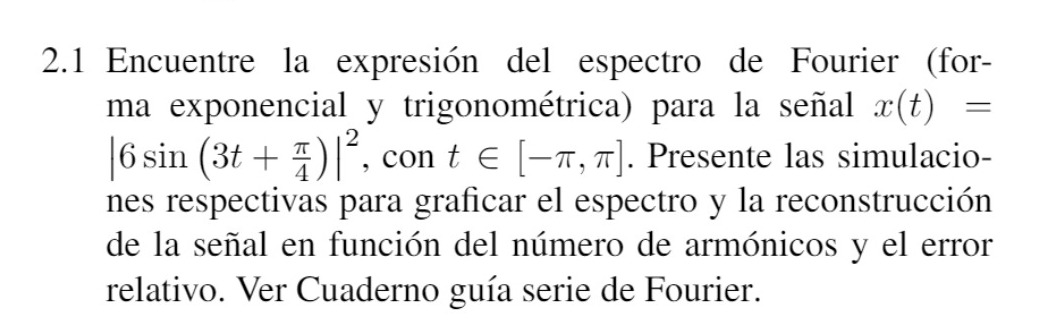

**Solución**
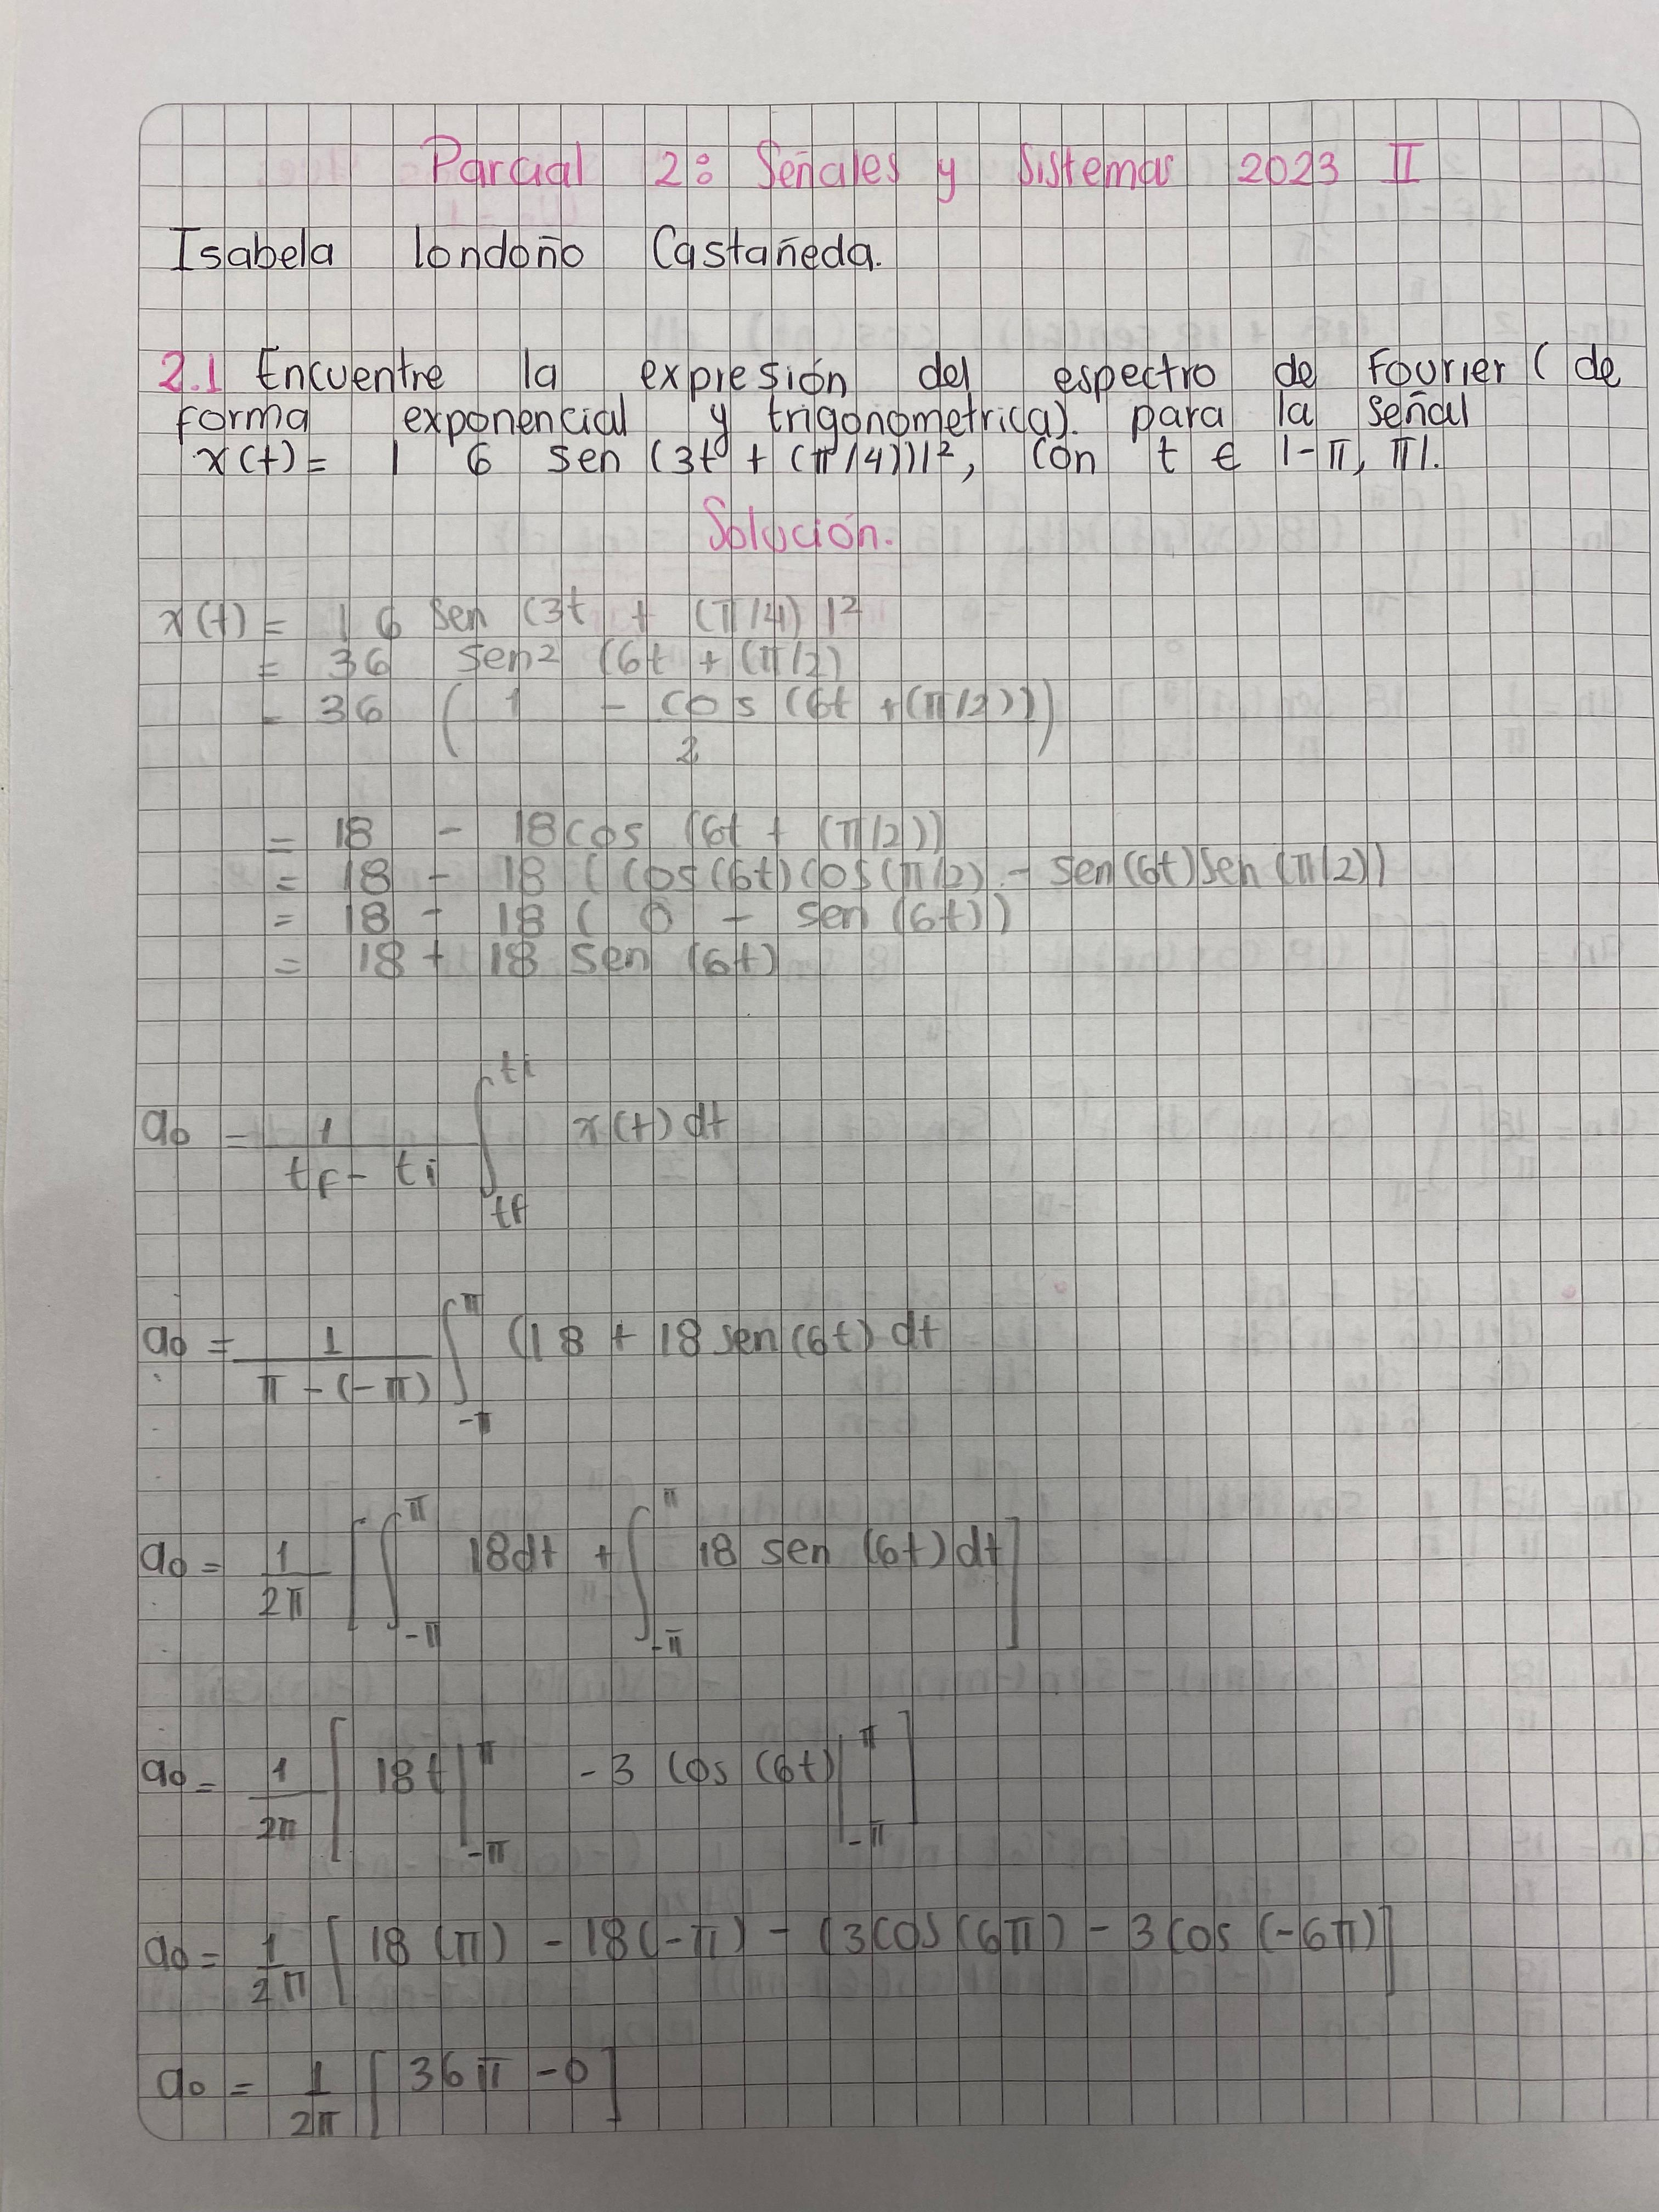



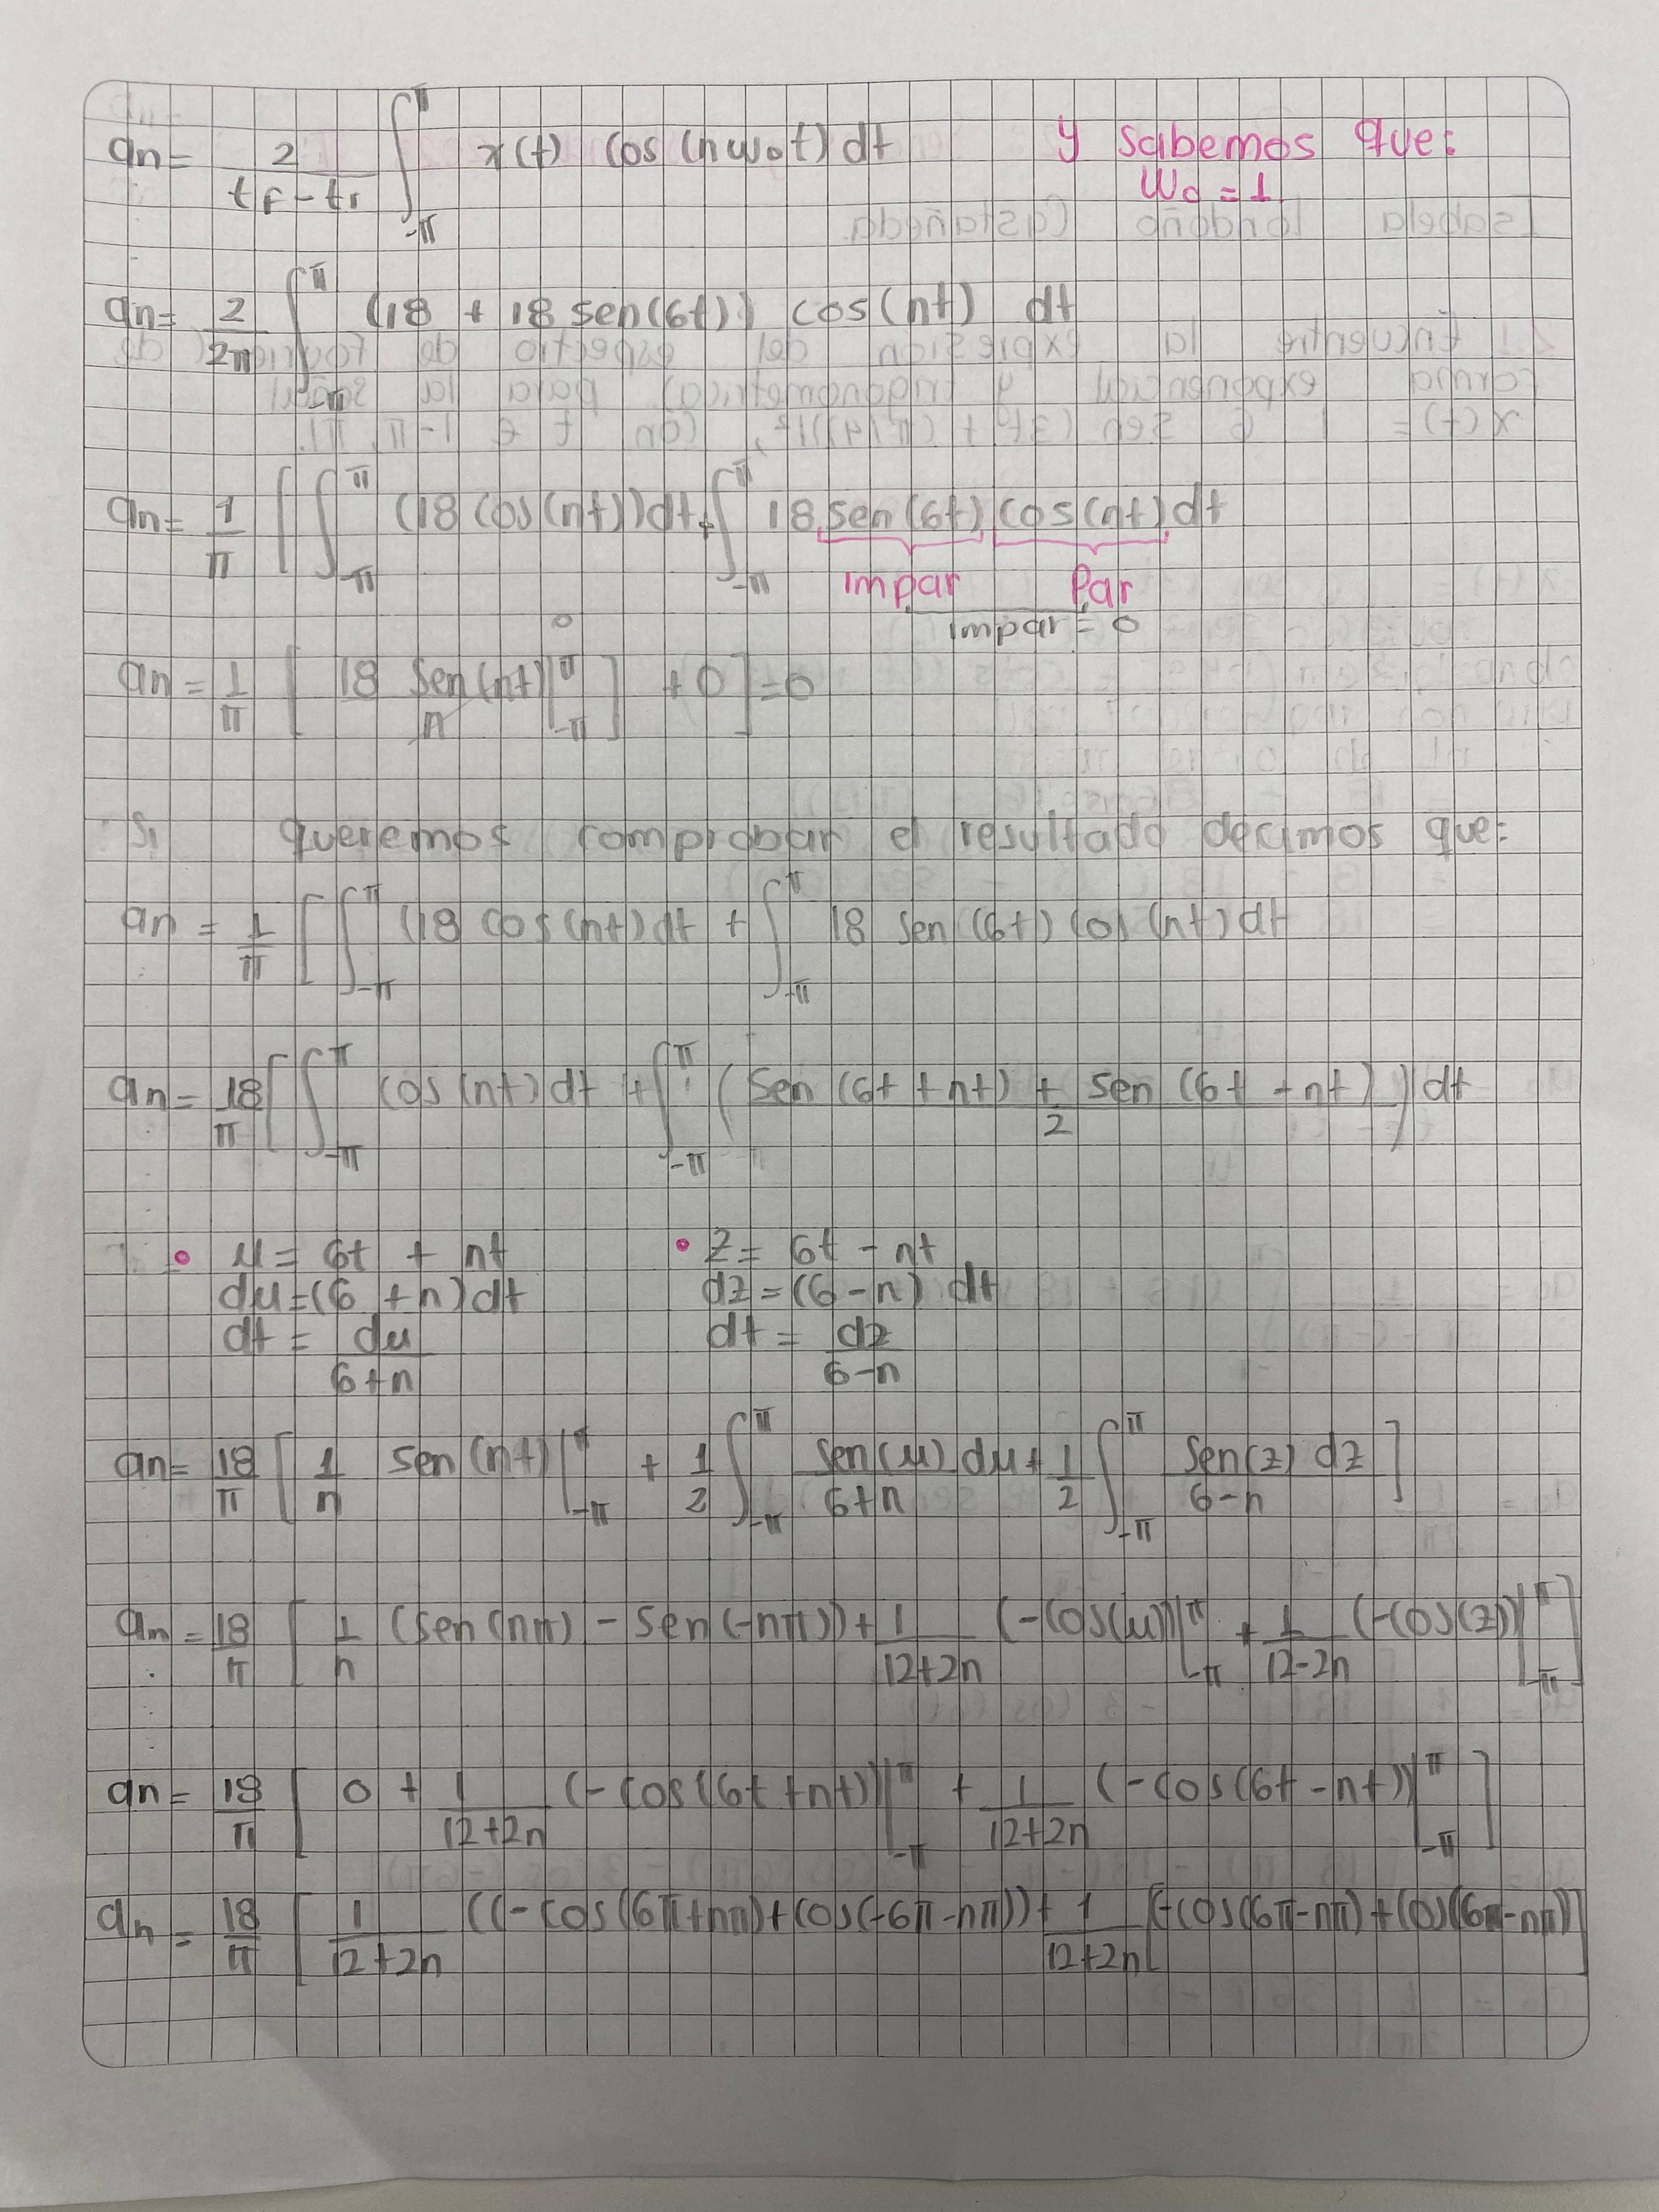

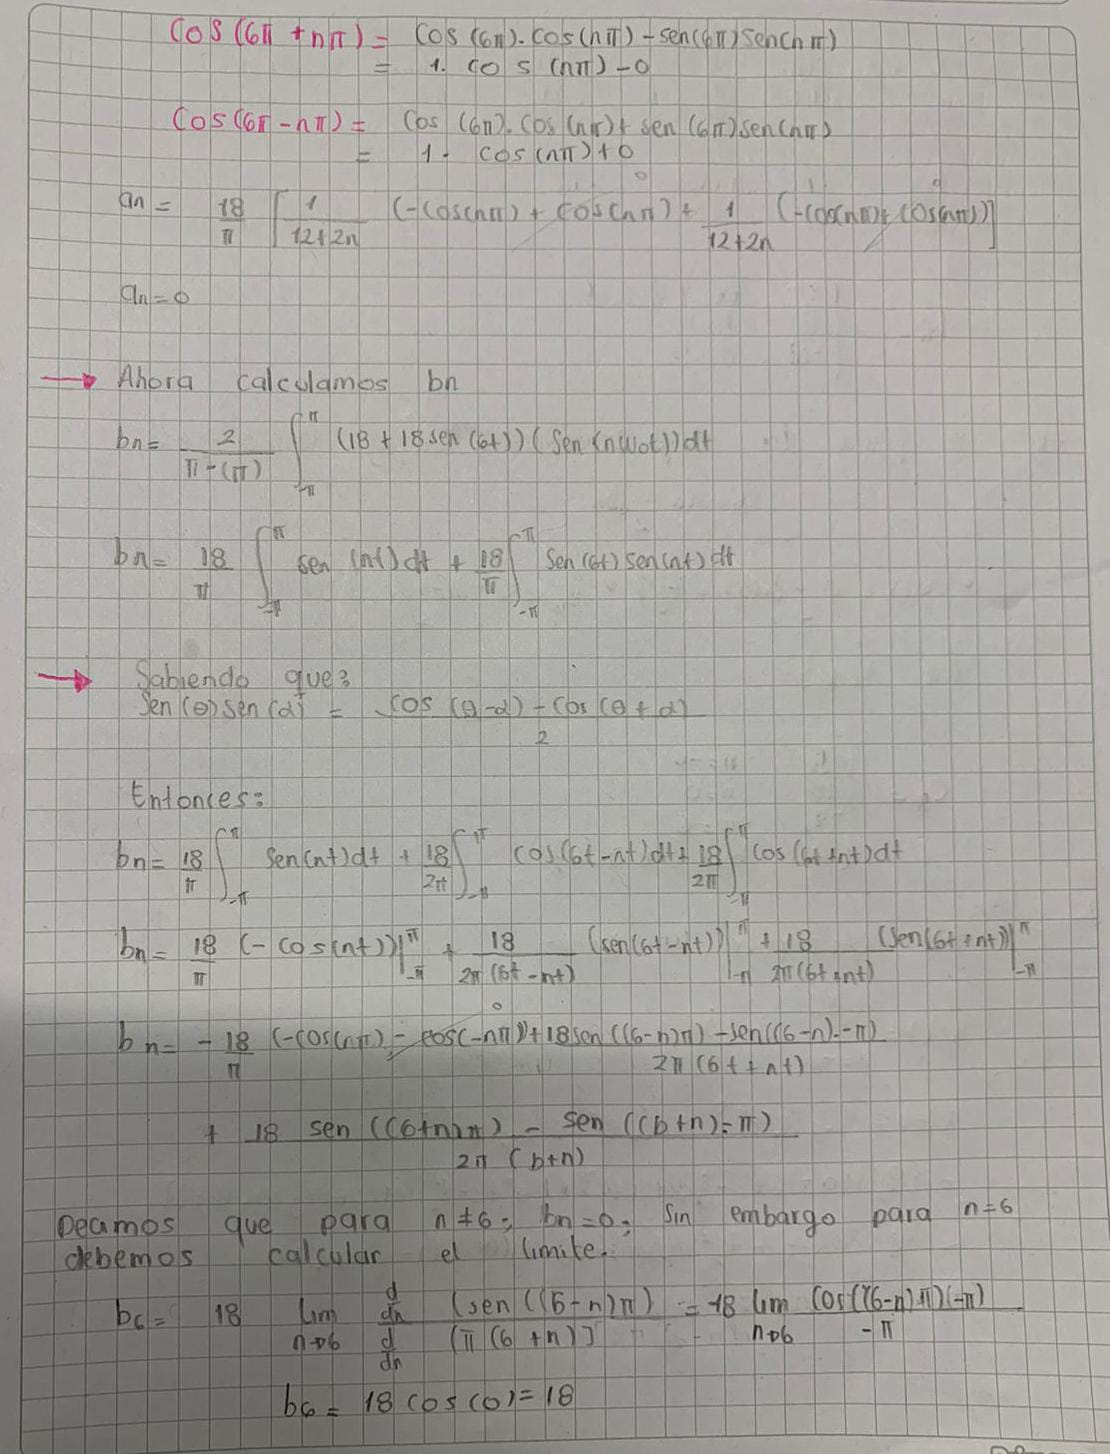

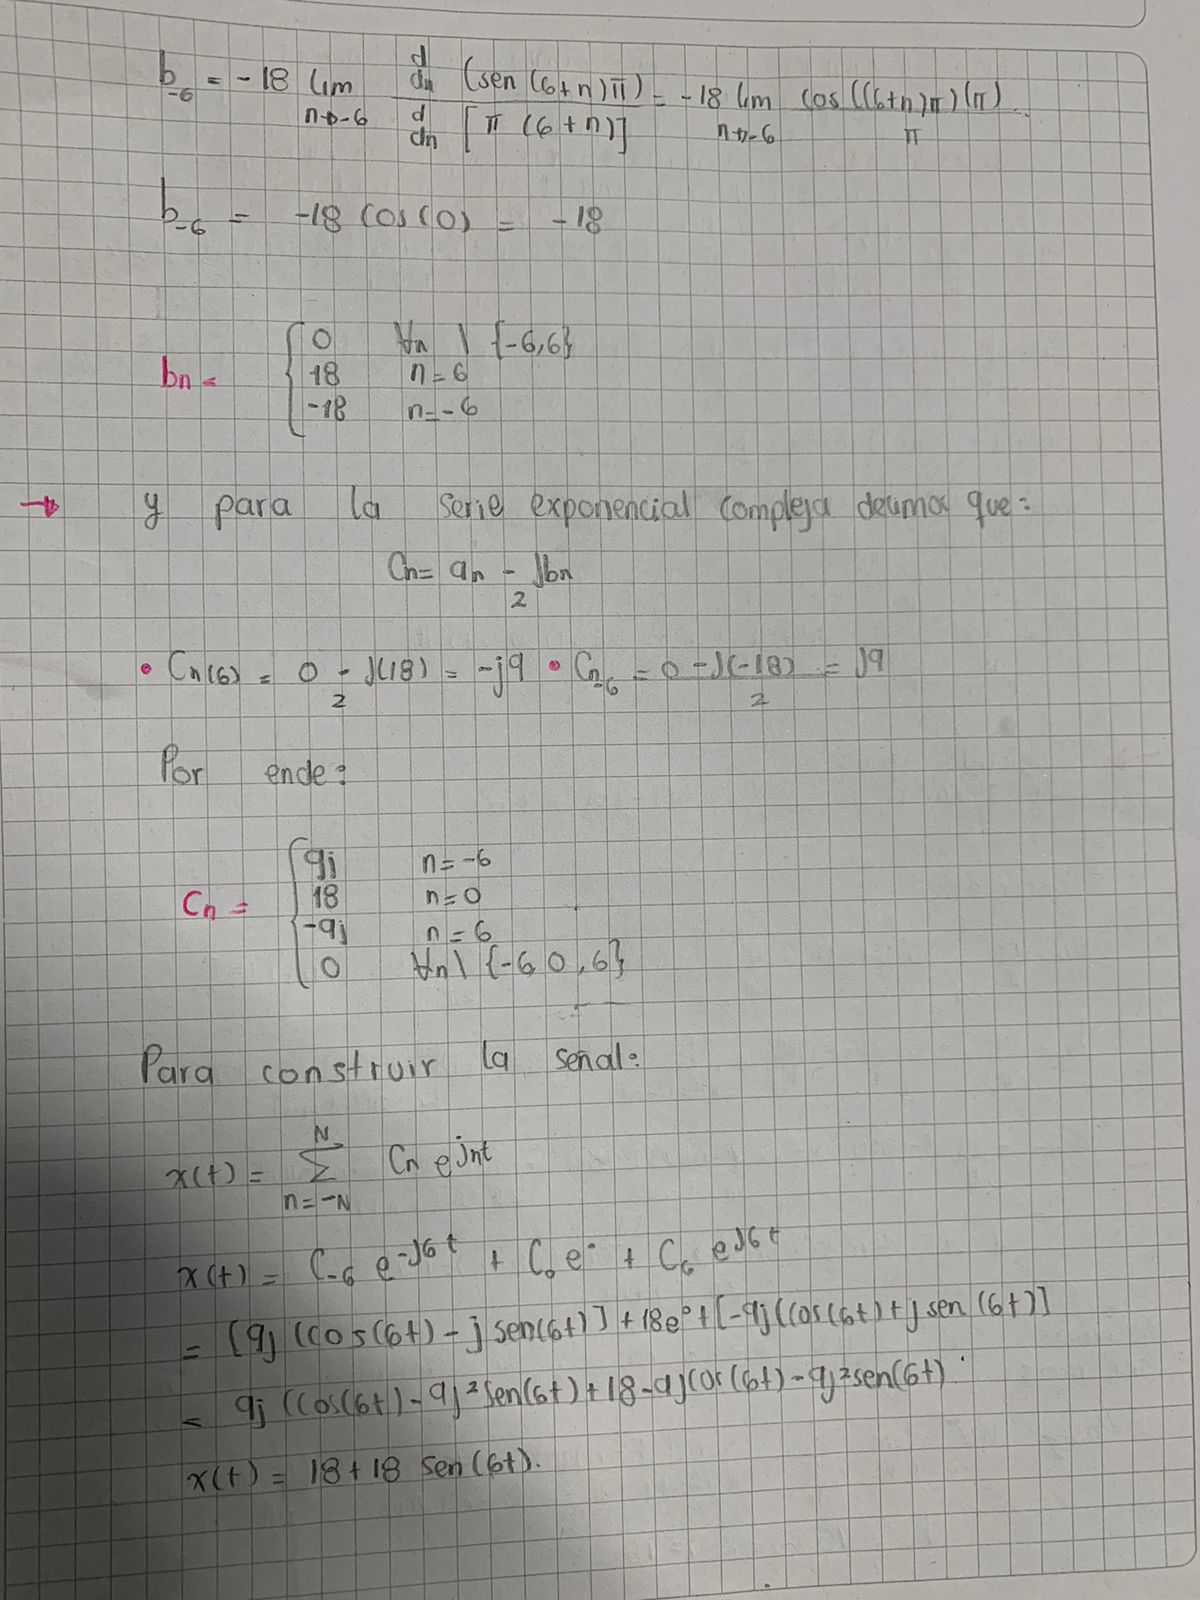

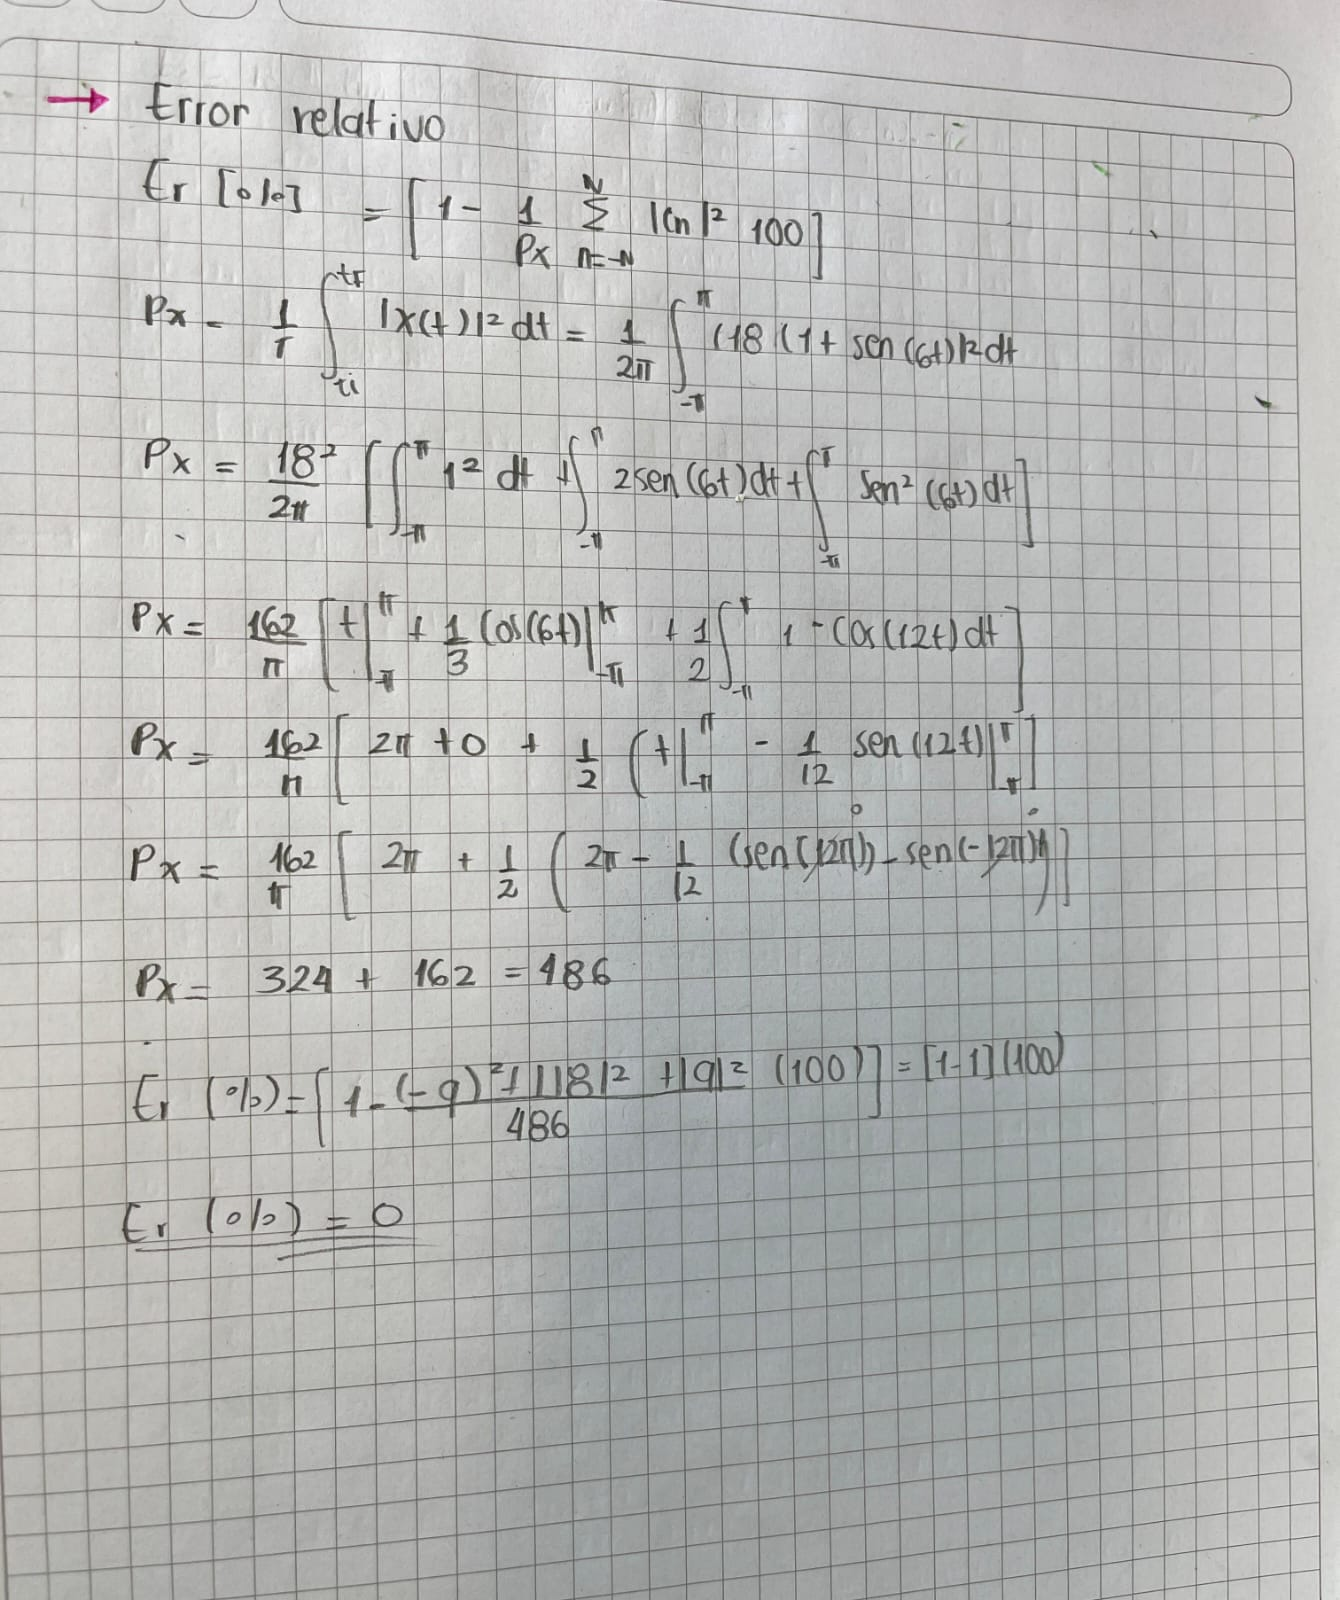

wo= 1.0
Fo= 1.5707963267948966


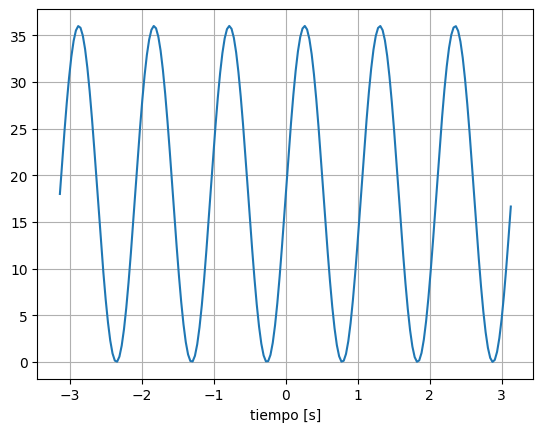

In [38]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 20*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo


x = abs(6*np.sin((3*tv)+(np.pi/4)))**2 #señal de entrada
#x = (18+18*np.sin(6*tv)) #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.grid()
plt.ylabel('')
plt.show()

In [39]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [40]:
# Importación de bibliotecas necesarias
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Definición de la función que grafica las bases de Fourier
def pltbase(n=1):
    # Grafica la parte real de la base
    plt.plot(tv, np.real(phin[:, int(n + N)]), label="Re{(t)}")

    # Etiquetas de los ejes y título
    plt.xlabel("t[s]", fontsize=14)
    plt.ylabel("(t)", fontsize=14)

    # Grafica la parte imaginaria de la base
    plt.plot(tv, np.imag(phin[:, int(n + N)]), label="Im{(t)}")

    # Agrega una cuadrícula al gráfico
    plt.grid()

    # Agrega una leyenda para indicar las partes real e imaginaria
    plt.legend()

    # Muestra el gráfico
    plt.show()
    return

# Creación de la interfaz interactiva utilizando interact
interact(pltbase, n=(-N, N, 1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [41]:
# Inicialización de un vector de coeficientes complejos
cn = np.zeros(2*N+1, dtype=np.complex_)

# Creación de un vector de armónicos que abarca desde -N hasta N
nv = np.linspace(-N, N, 2*N+1)

# Asignación de coeficientes específicos
cn[N] = 18       # Componente DC (C_0)
cn[N-6] = 1j*9   # Componente armónico -6
cn[N+6] = 1j*-9     # Componente armónico +6

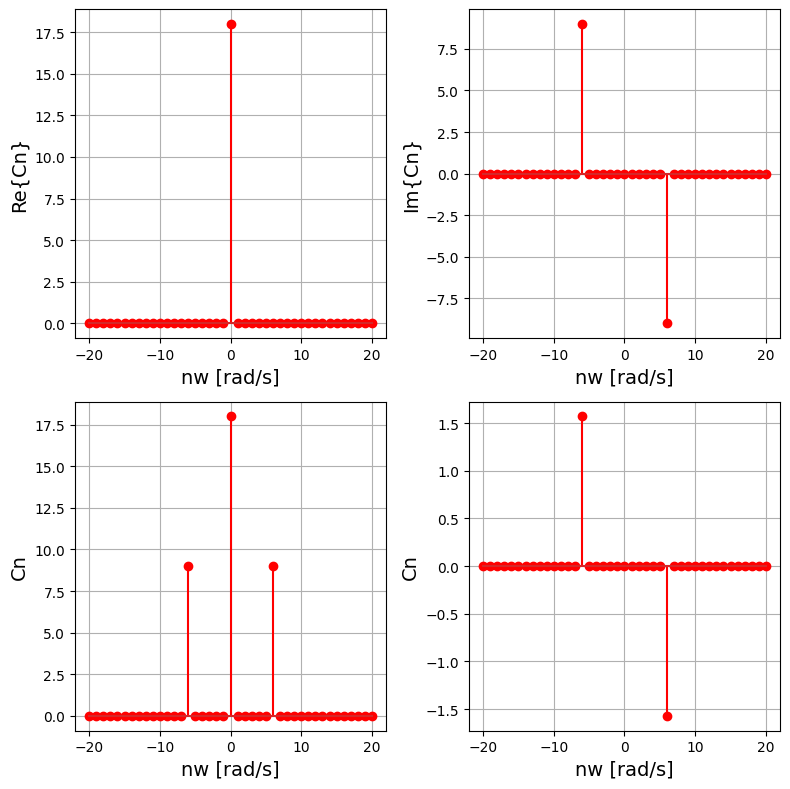

In [42]:
# Creación de una figura para los gráficos
fig = plt.figure(figsize=(8, 8))

# Gráfico de la parte real de los coeficientes Cn
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Re{Cn}', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la parte imaginaria de los coeficientes Cn
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Im{Cn}', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la magnitud del espectro (abs(Cn))
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Cn', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la fase del espectro (angle(Cn))
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Cn', fontsize=14)
plt.axis('tight')
plt.grid()

# Ajusta el diseño de los gráficos para una mejor presentación
fig.tight_layout()

In [43]:
# Potencia de la señal original x(t)
Px = 486

# Definición de la función que grafica la reconstrucción de la señal
def pltest(Na=1):
    # Rango de índices de coeficientes a considerar
    ind = range(N - Na, N + Na + 1)

    # Cálculo del error de reconstrucción
    er = 1 - np.sum(abs(cn[ind])**2) / Px

    # Señal reconstruida (xe) utilizando las bases y coeficientes seleccionados
    xe = phin[:, ind].dot(cn[ind])  # La función dot calcula el producto entre matrices/vectores

    # Graficar la señal estimada (en azul) y la señal original (en rojo)
    plt.plot(tv, xe, color='b', label='x(t)')  # Señal estimada o filtrada
    plt.plot(tv, x, color='r', label='x(t)')  # Señal original

    # Título del gráfico que muestra el error de reconstrucción
    plt.title('E_r=%.2f[%%]' % (100 * er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

# Creación de una interfaz interactiva para ajustar el número de armónicos utilizados (Na)
interact(pltest, Na=(1, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

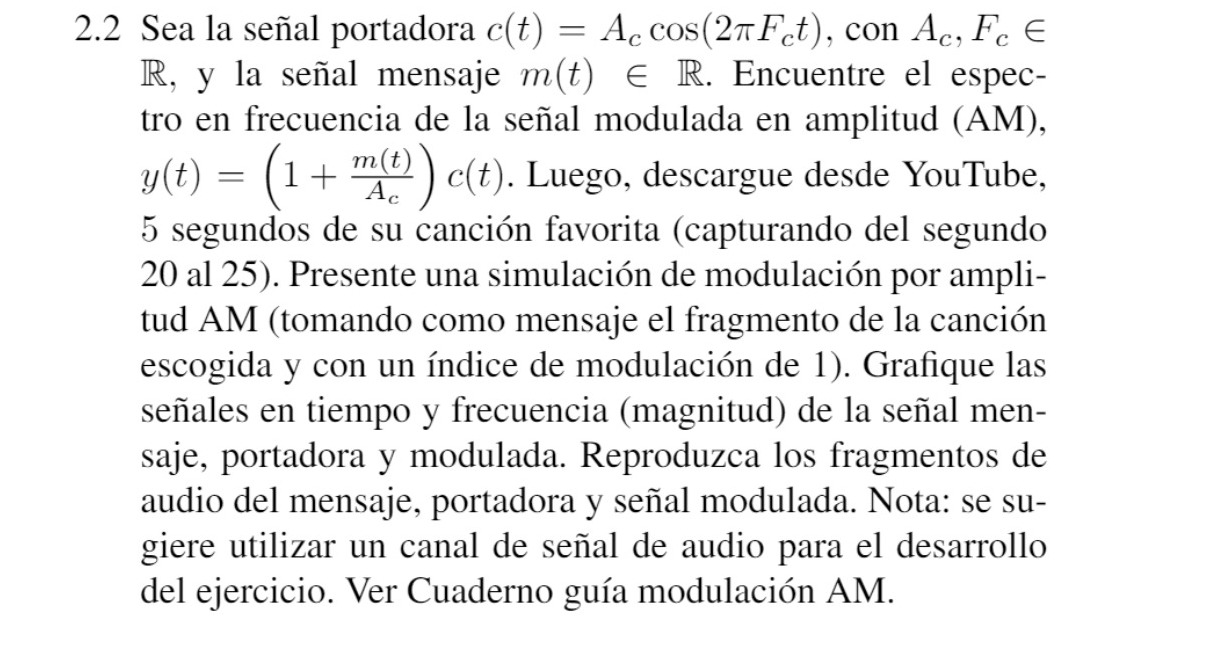

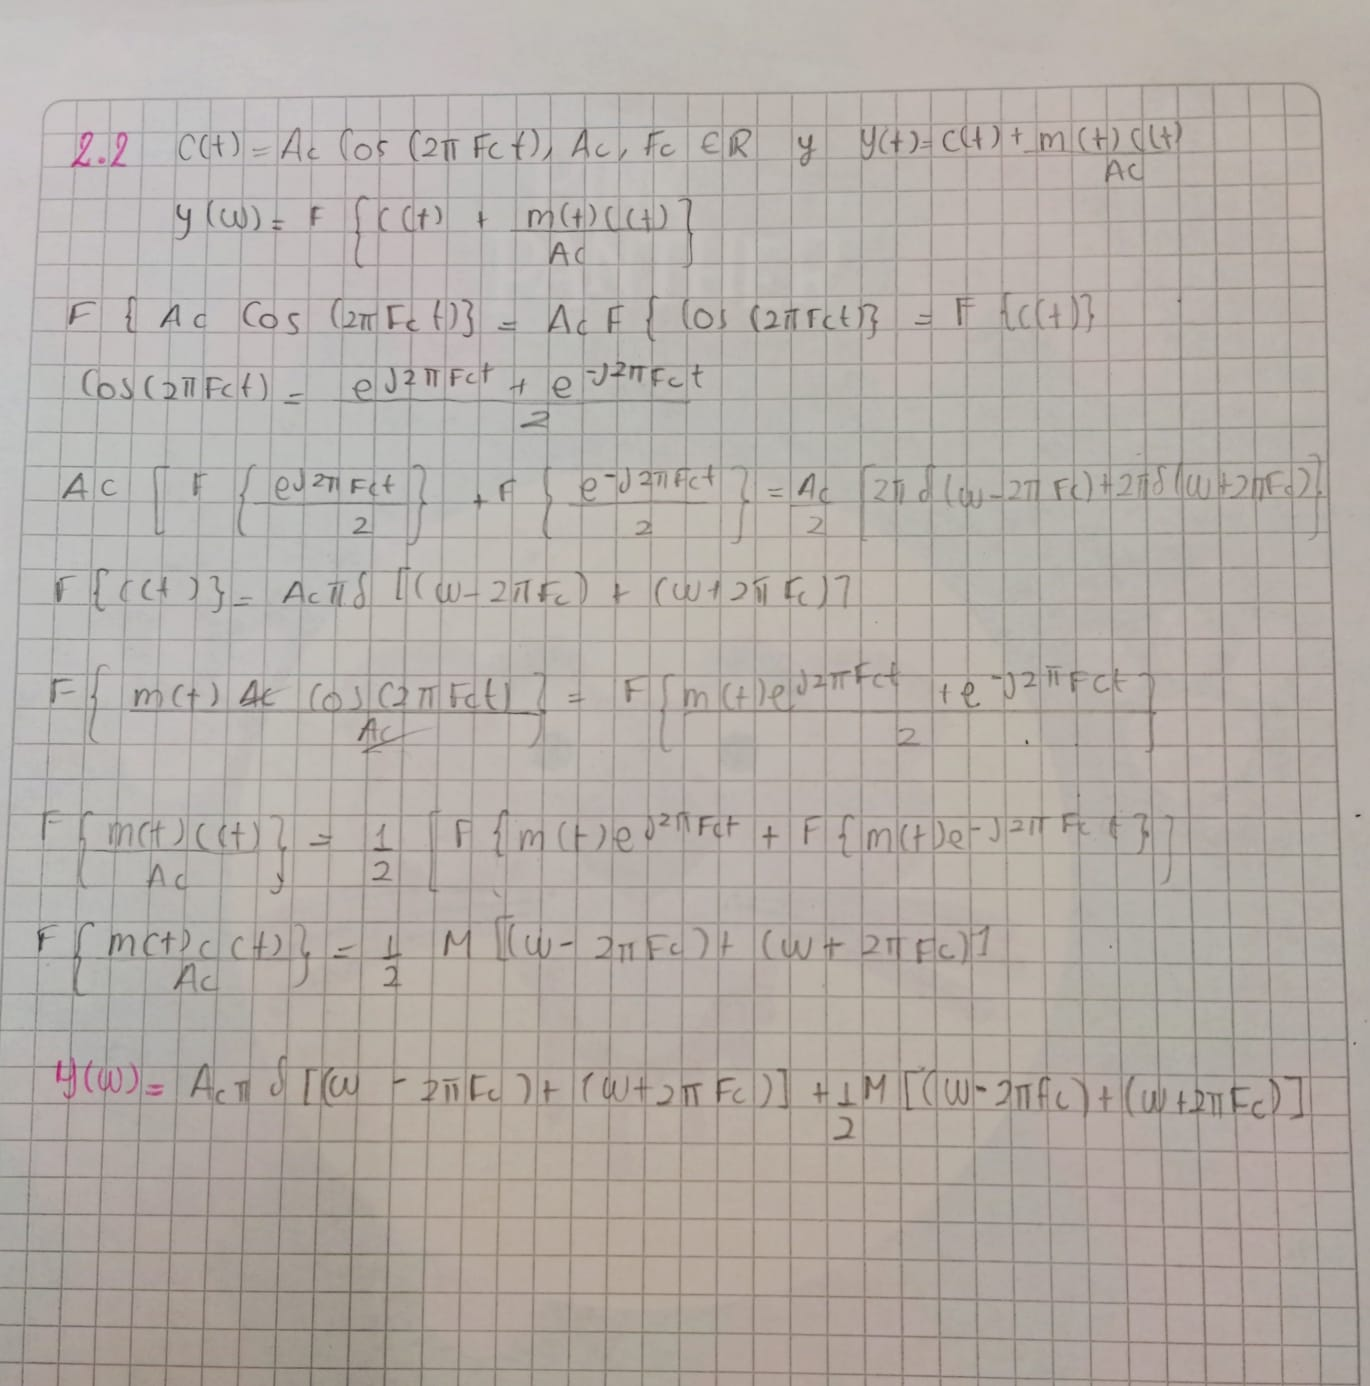

In [7]:
#simulación con canción de youtube
#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://www.youtube.com/watch?v=1eluvtQ2WGs"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.3 MB/s eta 0:00:00
[youtube] 1eluvtQ2WGs: Downloading webpage
[youtube] 1eluvtQ2WGs: Downloading player 2be84af7
[download] Destination: audio.NA
[download] 100% of 5.20MiB in 01:49
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [8]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [9]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [10]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))


Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [11]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [12]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

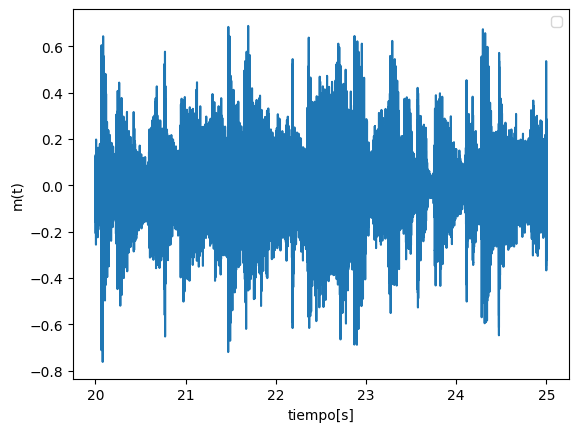

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()

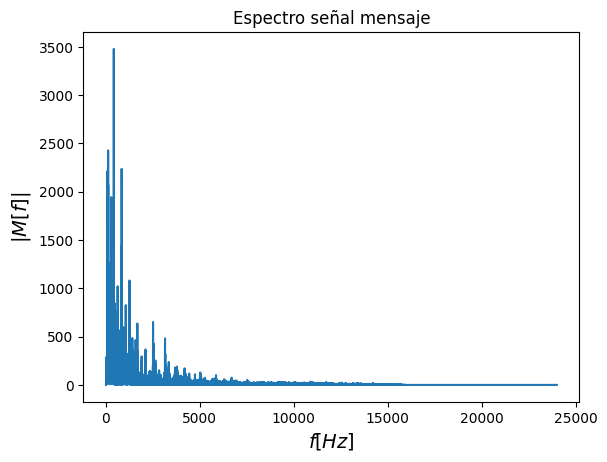

In [14]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()



In [15]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [16]:
#repoducir portadora
Audio(c,rate=fs)

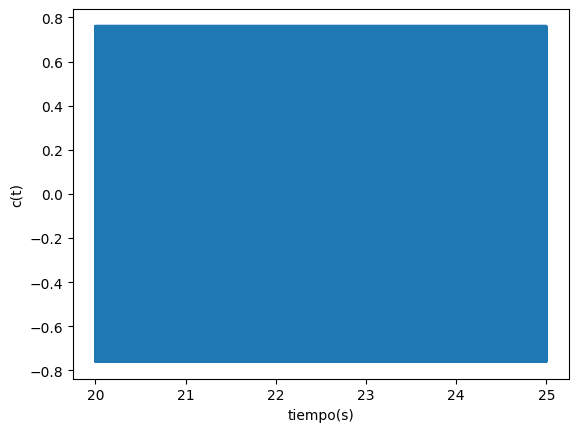

In [17]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo(s)')
plt.ylabel('c(t)')
plt.show()

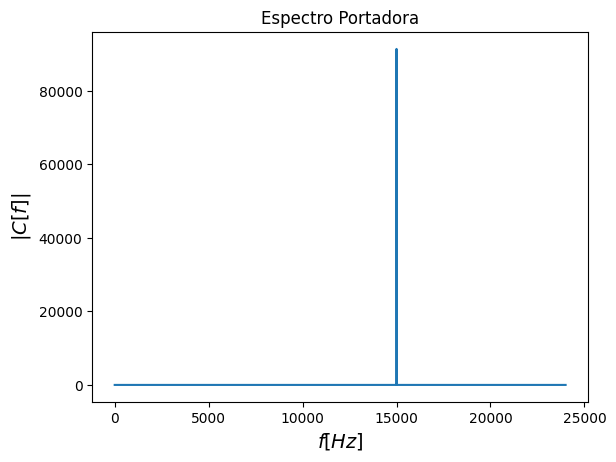

In [18]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()




In [19]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [20]:
#repoducir modulada
Audio(y,rate=fs)

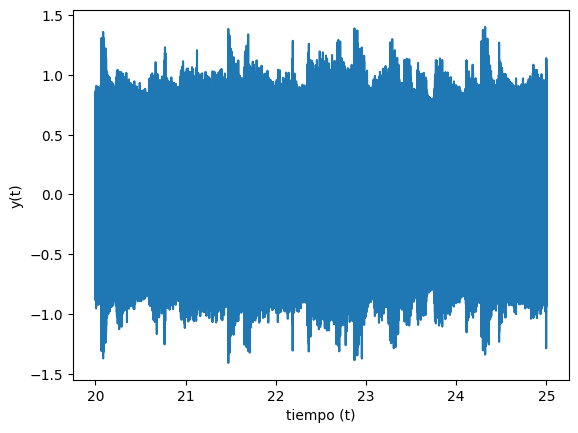

In [21]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo (t)')
plt.ylabel('y(t)')
plt.show()


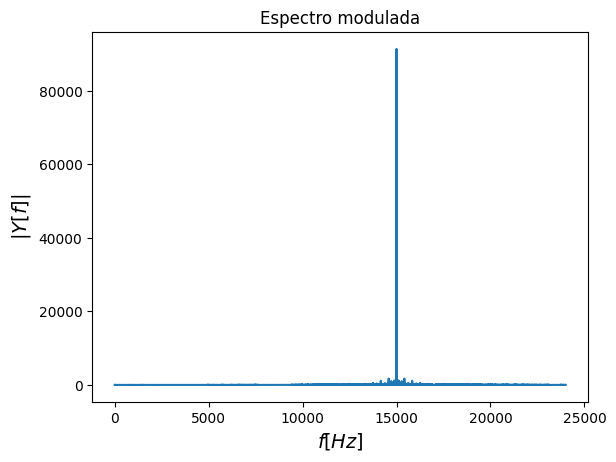

In [22]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()




# 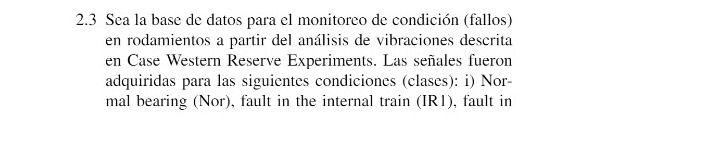

  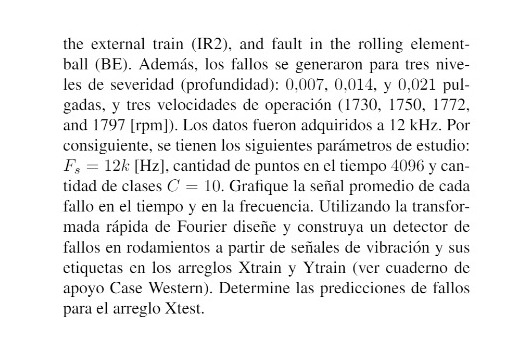

In [23]:
#librerias
import scipy.io as sio #
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
#La siguinte línea de codigo mantiene la autenticación y luego limpia los archivos temporales de cookies después de la descarga.
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-09 18:10:56--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 173.194.196.139, 173.194.196.138, 173.194.196.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.196.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/726u463jblaa2llnkmecl8epf5h4v9dv/1699553400000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=3417f230-8362-47ce-8c84-1dcddd310c5e [following]
--2023-11-09 18:10:57--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/726u463jblaa2llnkmecl8epf5h4v9dv/1699553400000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=3417f230-8362-47ce-8c84-1dcddd310c5e
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.250.1.13

In [24]:
#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)
# Mostrar las claves disponibles en el diccionario
import scipy.io as sio

# Cargar los datos desde el archivo .mat
path_ = 'CaractCE.mat'
dicX = sio.loadmat(path_)

# Iterar a través de todas las claves y mostrarlas una por una
for key in dicX:
    print(key)

# Iterar a través de las claves en el diccionario y mostrar los datos asociados a cada clave
for key, value in dicX.items():
    print(f'Base de datos: {key}')
    print(value)
    print('\n')

__header__
__version__
__globals__
CE
E
F
Base de datos: __header__
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jul 21 06:26:43 2018'


Base de datos: __version__
1.0


Base de datos: __globals__
[]


Base de datos: CE
[[-2.82991778e+03 -5.05738346e+03  3.20558619e+03 ...  6.38080957e+00
   7.68604627e+00  8.17023104e+00]
 [-2.86869478e+03 -5.00993965e+03  3.19676653e+03 ...  6.40760702e+00
   7.69964487e+00  8.17002744e+00]
 [-2.95145599e+03 -5.13354811e+03  3.18277814e+03 ...  6.39972309e+00
   7.71905087e+00  8.17839470e+00]
 ...
 [-9.45334754e+03 -1.30512052e+04  1.93672415e+03 ...  6.42458072e+00
   7.72999447e+00  8.17061531e+00]
 [-8.43847687e+03 -1.18579421e+04  2.10372911e+03 ...  6.36443646e+00
   7.65425929e+00  8.13380289e+00]
 [-8.84877618e+03 -1.15516835e+04  2.08918848e+03 ...  6.40814893e+00
   7.71778834e+00  8.17584808e+00]]


Base de datos: E
[[ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 ...
 [ 1  3 10]
 [ 1  3 10]
 [ 1  3 10]]


Base de datos: F
[[ 0.01460308  

In [25]:
Xt = dicX['F']
print(Xt.shape)

(1200, 4000)


In [26]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [27]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [28]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [29]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

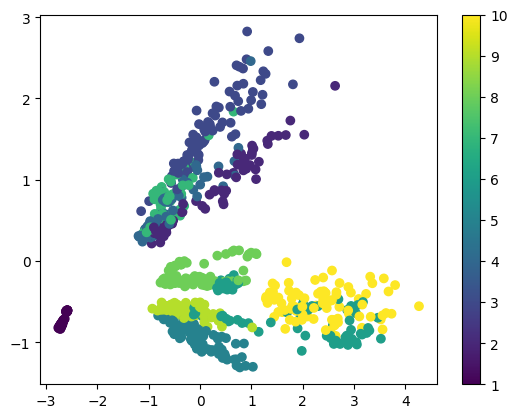

In [30]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T

#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [31]:
np.unique(Ytrain) #Identificar y extraer valores unicos de categorias que estan almacenados en Ytrain.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

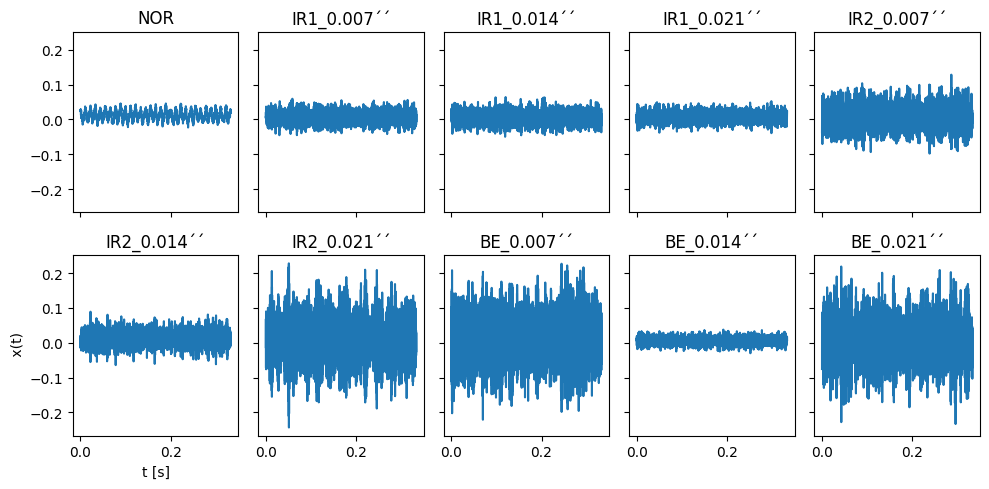

In [32]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

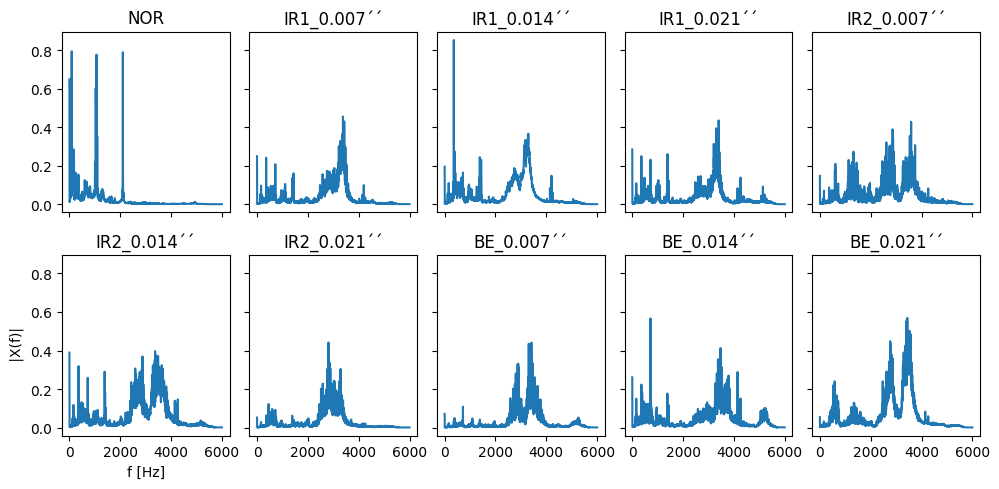

In [33]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()

In [34]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [35]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [36]:
Ytest_e = Ytrain[ind_]

In [37]:
from sklearn.metrics import accuracy_score
print(f"ACC={accuracy_score(Ytest,Ytest_e)}")

ACC=1.0
